# Explanatory Data Analysis Challenge (Olympic Games)

## Data Import and Inspection

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
import seaborn as sns

In [4]:
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
dic = pd.read_csv('dictionary.csv')

In [5]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [7]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


## Merging and Concatenating

#### 1. I am merging summer and winter data frame under the name Olympcs.

In [8]:
olympics = pd.concat([summer,winter],axis = 0 , keys = ['Summer','Winter'], names = ['Edition']).reset_index().drop(columns = 'level_1')

In [9]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [10]:
olympics.tail()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold
36934,Winter,2014,Sochi,Skiing,Snowboard,"TRESPEUCH, Chloe",FRA,Women,Snowboard Cross,Bronze


#### 2. I am creating an additional column to differentiate the edition. I will use the index to make the difference between both types.

#### 3. Now I am going to add the full country name from dictionary to Olympics thanks to a join.

In [11]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [12]:
olympics.Country

0        HUN
1        AUT
2        GRE
3        GRE
4        GRE
        ... 
36930    GBR
36931    USA
36932    CAN
36933    CZE
36934    FRA
Name: Country, Length: 36935, dtype: object

In [13]:
olympics = olympics.merge(dic.iloc[:, :2], how = 'left', left_on ='Country', right_on = 'Code').drop(columns = ['Code'])

In [14]:
olympics.reset_index(drop = True , inplace = True)

In [15]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [16]:
olympics.rename(columns = {"Country_x":"Code", "Country_y": "Country"}, inplace = True)

In [17]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! (Alternatively, you can find a Solution for this at the end of this Notebook!) 

In [18]:
olympics.columns.str.rstrip()

Index(['Edition', 'Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code',
       'Gender', 'Event', 'Medal', 'Country'],
      dtype='object')

In [19]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [20]:
dic.rename(columns = {"GDP per Capita":"GDP"}, inplace= True)

In [21]:
olympics.loc[olympics.Country.isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [22]:
olympics.loc[olympics.Country.isna()].index

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979,
            33980],
           dtype='int64', length=6367)

dic_missing_value = {'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

for key in dic_missing_value.keys():
    olympics.loc[olympics.Code == key,'Country'] = dic_missing_value[key]

In [23]:
missing_C_index = olympics.loc[olympics.Country.isnull()].index
missing_C_index

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979,
            33980],
           dtype='int64', length=6367)

In [24]:
olympics.loc[olympics.Country.isnull()].Code.value_counts()

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [25]:
old_c = olympics.loc[olympics.Country.isnull(), :].Code.value_counts().index
old_c

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [26]:
mapper = pd.Series(index=old_c, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [27]:
mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [28]:
olympics.loc[missing_C_index, "Code"].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [29]:
olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)

In [30]:
olympics.loc[missing_C_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [31]:
row_to_remove_index = olympics.loc[olympics.Code.isna()].index

In [32]:
olympics.dropna(subset = ['Code'], inplace = True)

In [33]:
olympics.reset_index(drop=True,inplace=True)

In [34]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

In [35]:
olympics.Medal

0          Gold
1        Silver
2        Bronze
3          Gold
4        Silver
          ...  
36926    Bronze
36927      Gold
36928    Silver
36929      Gold
36930    Bronze
Name: Medal, Length: 36931, dtype: object

In [36]:
olympics.Medal = olympics.Medal.astype("category")

In [37]:
olympics.Medal.sort_values()
olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True)

0          Gold
1        Silver
2        Bronze
3          Gold
4        Silver
          ...  
36926    Bronze
36927      Gold
36928    Silver
36929      Gold
36930    Bronze
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

In [38]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [39]:
olympics.groupby(['Country']).Medal.count().sort_values(ascending = False).head(10)

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Medal, dtype: int64

In [40]:
olympics.groupby(['Country','Edition']).Medal.count().unstack(fill_value = 0).sort_values(by = ['Winter'] ,ascending = False).head(10)

Edition,Summer,Winter
Country,,
United States,4585,653
Canada,649,625
Norway,554,457
Soviet Union,2049,440
Finland,456,434
Sweden,1044,433
Germany,1305,360
Switzerland,380,285
Austria,146,280


In [41]:
olympics_medals = olympics.groupby(['Country','Medal']).Medal.count().unstack(fill_value = 0).sort_values(by = ['Gold','Silver','Bronze'], ascending = False).head(50)

#### As we can see there are what we can call typpical winter games countries such as Canada, Norway, finland. The USA are dominated every domains by gathering the highest number of medal whatever edition it is.

In [42]:
olympics_medals

Medal,Bronze,Gold,Silver
Country,,,
United States,1265,2402,1571
Soviet Union,677,1088,724
Germany,572,589,504
United Kingdom,587,580,632
Italy,481,534,473
Sweden,505,476,496
Canada,369,470,435
France,578,444,526
Hungary,359,412,320


## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

In [43]:
medals_per_country = pd.crosstab(index = olympics.Country, columns = olympics.Medal, 
                                 margins = True, margins_name= "Total")
medals_per_country

Medal,Bronze,Gold,Silver,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,5,2,15
Argentina,91,69,99,259
Armenia,8,1,2,11
Australasia,5,20,4,29
...,...,...,...,...
West Indies Federation,5,0,0,5
Yugoslavia,119,143,180,442
Zambia,1,0,1,2


In [44]:
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"]].sort_values(by = ["Total", "Gold", "Silver", "Bronze"], ascending = False)

In [45]:
medals_per_country.drop("Total", axis = 0 , inplace = True)

In [46]:
medals_per_country

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
...,...,...,...,...
Iraq,1,0,0,1
Macedonia,1,0,0,1
Mauritius,1,0,0,1


In [47]:
medals_per_country = medals_per_country.merge(dic,how = 'left', left_index = True, 
                                              right_on = "Country").set_index("Country").drop(columns = 'Code')

In [48]:
medals_per_country.head(50)

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,3.214188e+08,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,6.513823e+07,43875.969614
Germany,1665,589,504,572,8.141314e+07,41313.313995
France,1548,444,526,578,6.680838e+07,36205.568102
Italy,1488,534,473,481,6.080208e+07,29957.804315
Sweden,1477,476,496,505,9.798871e+06,50579.673649
Canada,1274,470,435,369,3.585177e+07,43248.529909
Australia,1204,317,408,479,2.378117e+07,56310.962993


In [49]:
olympics["Games"] = olympics.apply(lambda x: str(x.Year) + " " + x.City, axis = 1)


In [50]:
olympics.Games.value_counts()

2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1945
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1956 Melbourne / Stockholm      885
1912 Stockholm                  885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris                  

In [51]:
olympics.groupby("Country").apply(lambda x: x.Games.nunique())

Country
Afghanistan                2
Algeria                    6
Argentina                 18
Armenia                    4
Australasia                2
                          ..
West Germany              12
West Indies Federation     1
Yugoslavia                18
Zambia                     2
Zimbabwe                   3
Length: 145, dtype: int64

In [52]:
medals_per_country["Total_Games"] = olympics.groupby("Country").apply(lambda x: x.Games.nunique())

In [53]:
medals_per_country

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Germany,1665,589,504,572,81413145.0,41313.313995,25
France,1548,444,526,578,66808385.0,36205.568102,47
...,...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388,1
Macedonia,1,0,0,1,2078453.0,4852.657848,1
Mauritius,1,0,0,1,1262605.0,9252.110724,1


In [55]:
medals_per_country_rank = medals_per_country.rank(ascending=False).head(50)

## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

In [60]:
medals_per_country_rank[['GDP','Total_Games','Population','Total']].corr(method = 'spearman')

,GDP,Total_Games,Population,Total
GDP,1.000000,0.811075,-0.303659,0.667915
Total_Games,0.811075,1.000000,-0.101508,0.681869
Population,-0.303659,-0.101508,1.000000,0.090463
Total,0.667915,0.681869,0.090463,1.000000


## Aggregating and Ranking

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

In [129]:
olympics.groupby(['Country','Edition']).Medal.count().unstack(fill_value = 0)

Edition,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [235]:
sum_and_winter_olympics = pd.crosstab(olympics.Country, olympics.Edition)
sum_and_winter_olympics

Edition,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [146]:
olympics.groupby(['Country','Gender']).Medal.count().unstack(fill_value = 0)

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [236]:
men_and_women_olympics = pd.crosstab(olympics.Country, olympics.Gender)
men_and_women_olympics

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [238]:
medal_for_cats = pd.concat([sum_and_winter_olympics,men_and_women_olympics], axis = 1 )

In [239]:
medal_for_cats

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [153]:
medal_for_cats['Total'] = medal_for_cats.Summer+medal_for_cats.Winter

In [158]:
medal_for_cats.sort_values(by = 'Total',ascending = False, inplace=True)

In [187]:
medal_for_cats_top50 = medal_for_cats.rank(ascending= True).head(50)

In [188]:
medal_for_cats_top50

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
Italy,6.0,11.0,5.0,18.0,6.0
Sweden,9.0,6.0,6.0,16.5,7.0
Canada,15.0,2.0,9.0,7.0,8.0
Australia,7.0,25.5,12.0,5.0,9.0


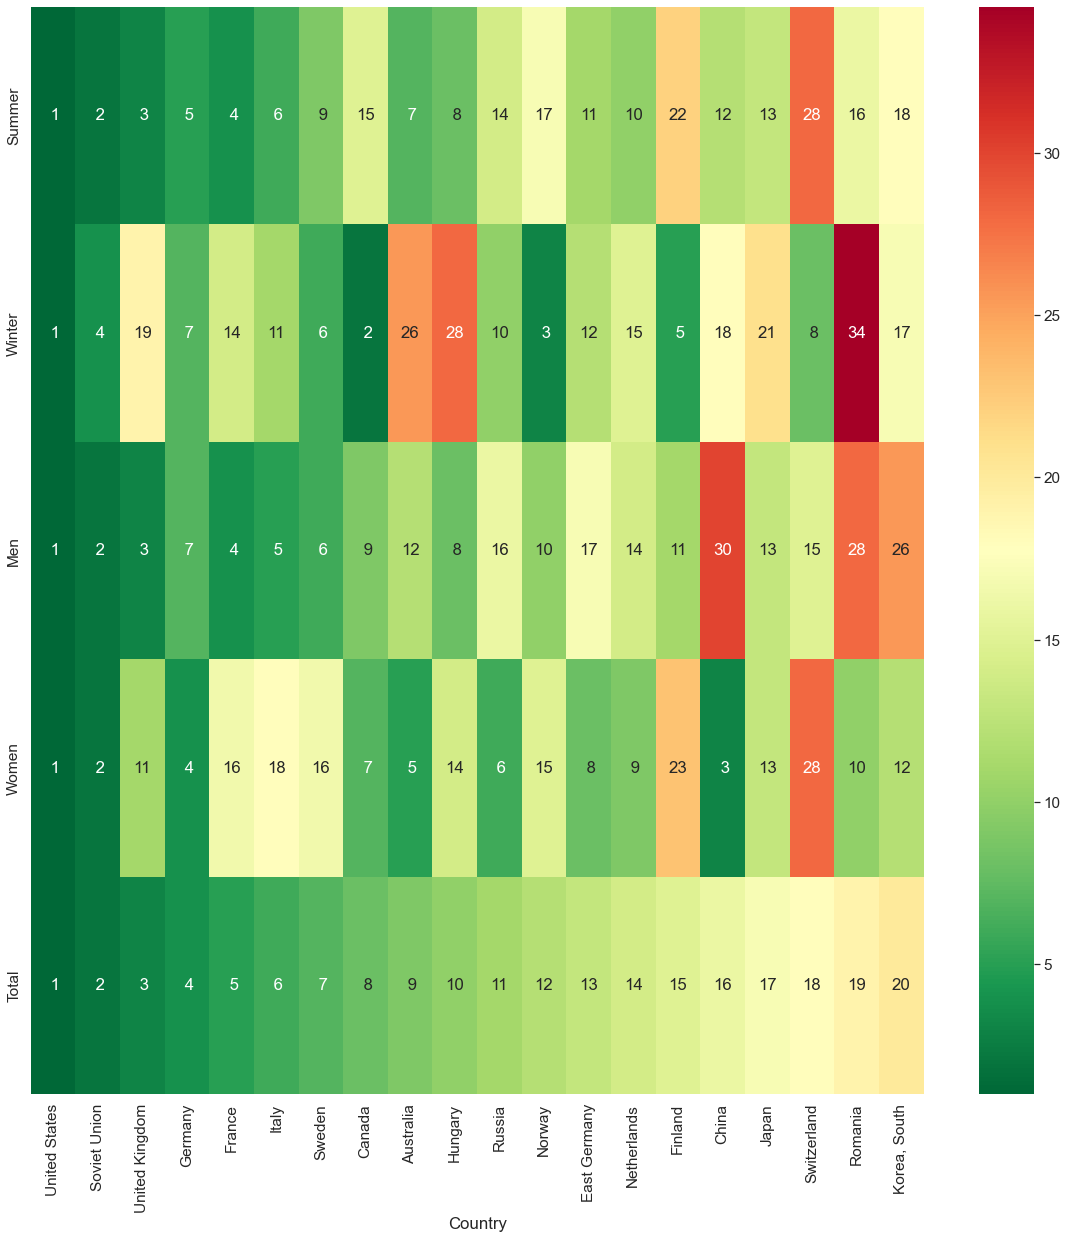

In [189]:
plt.figure(figsize=(20,20))
sns.heatmap(medal_for_cats_top50.head(20).T, fmt='2.0f',cmap = 'RdYlGn_r',annot=True)
plt.show()

## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

In [191]:
medal_for_cats_top50.head()

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0


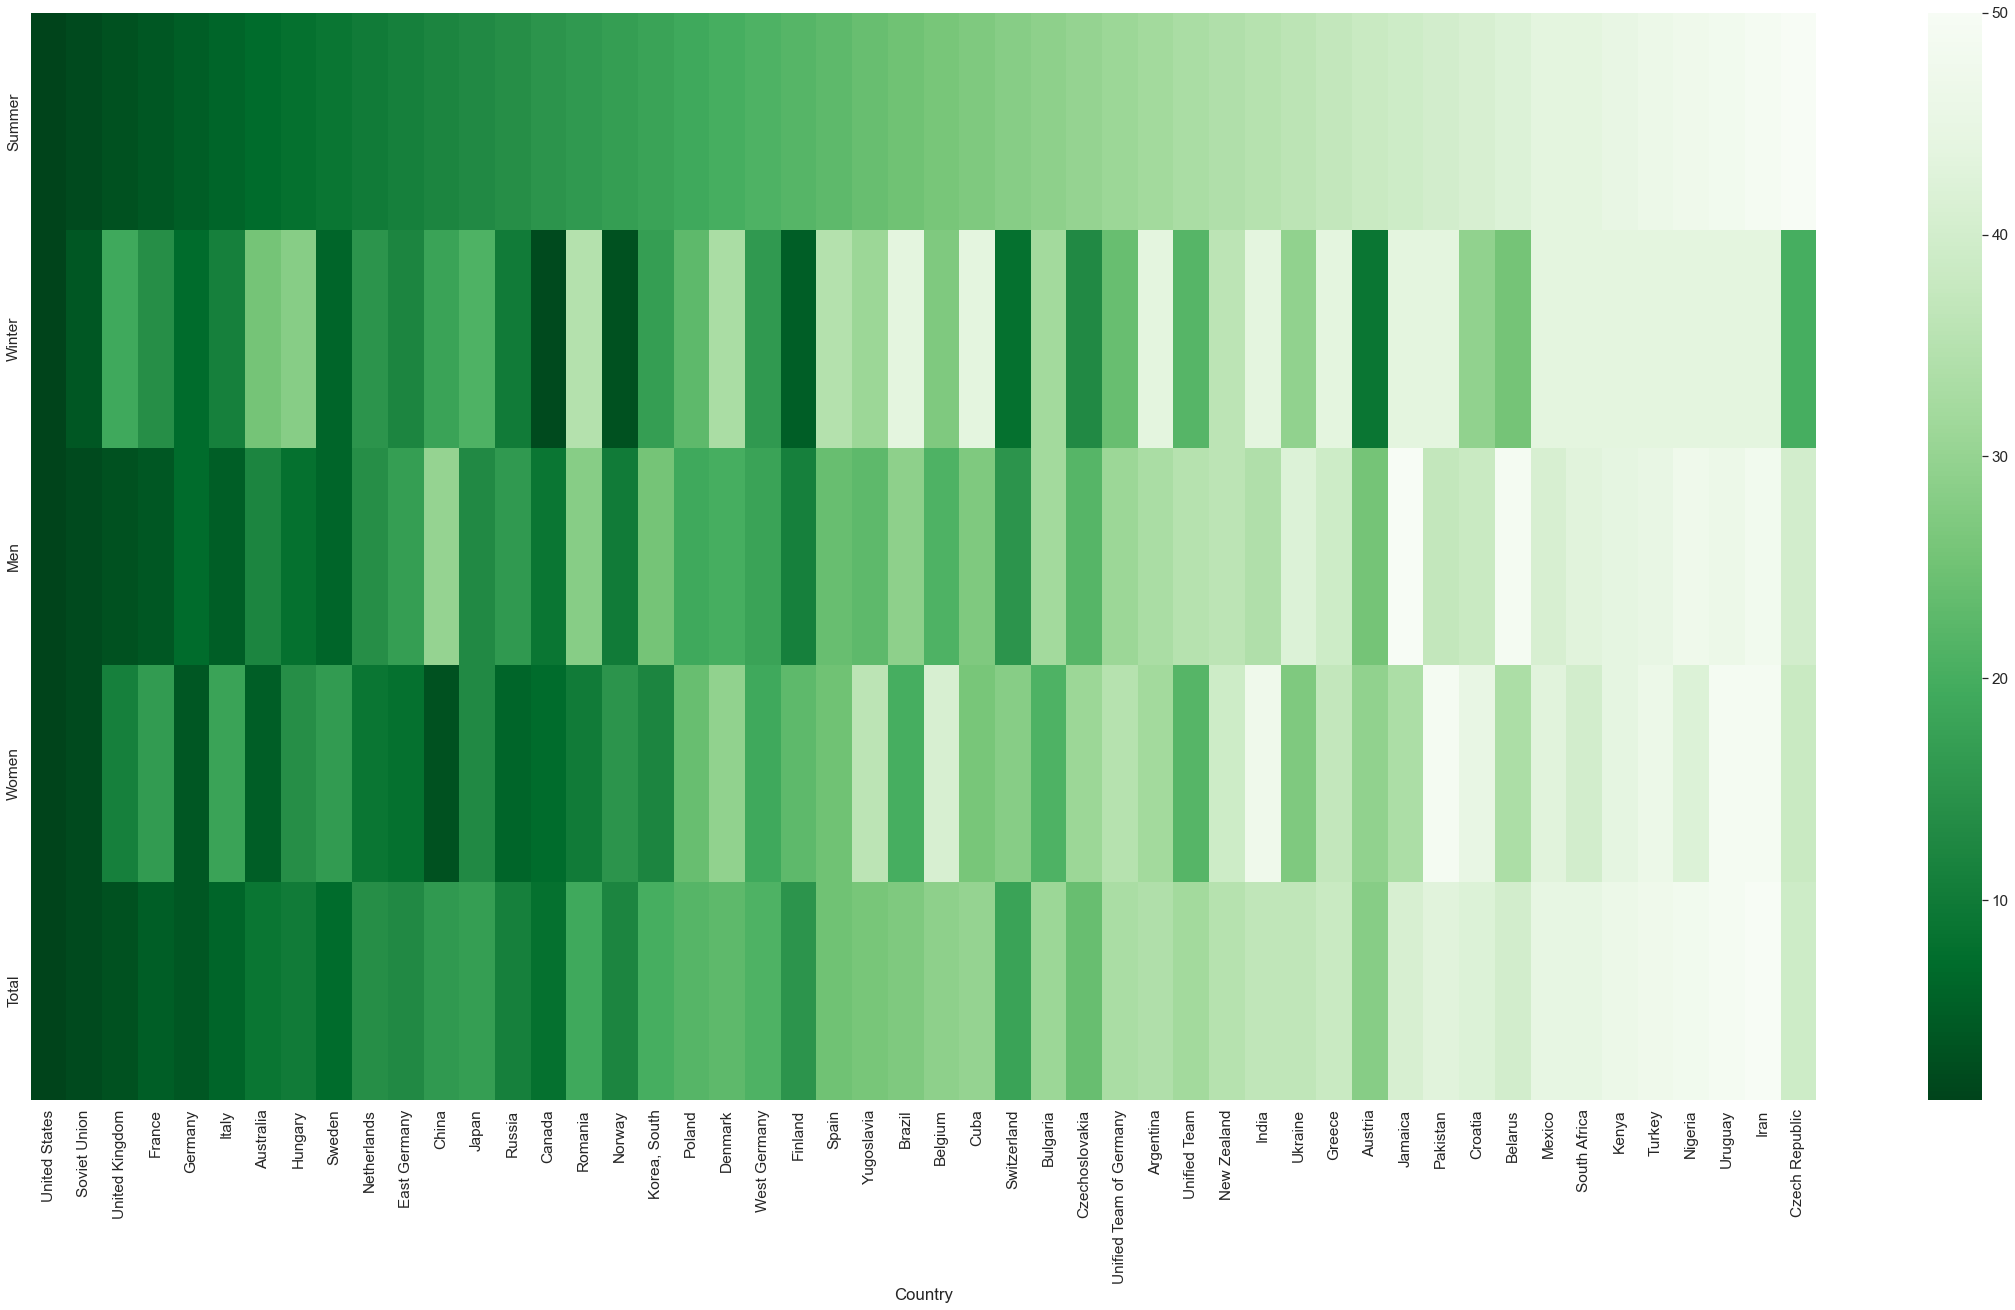

In [200]:
plt.figure(figsize=(40,20))
sns.heatmap(medal_for_cats_top50.sort_values(by = 'Summer').T, cmap = 'Greens_r')
plt.show()

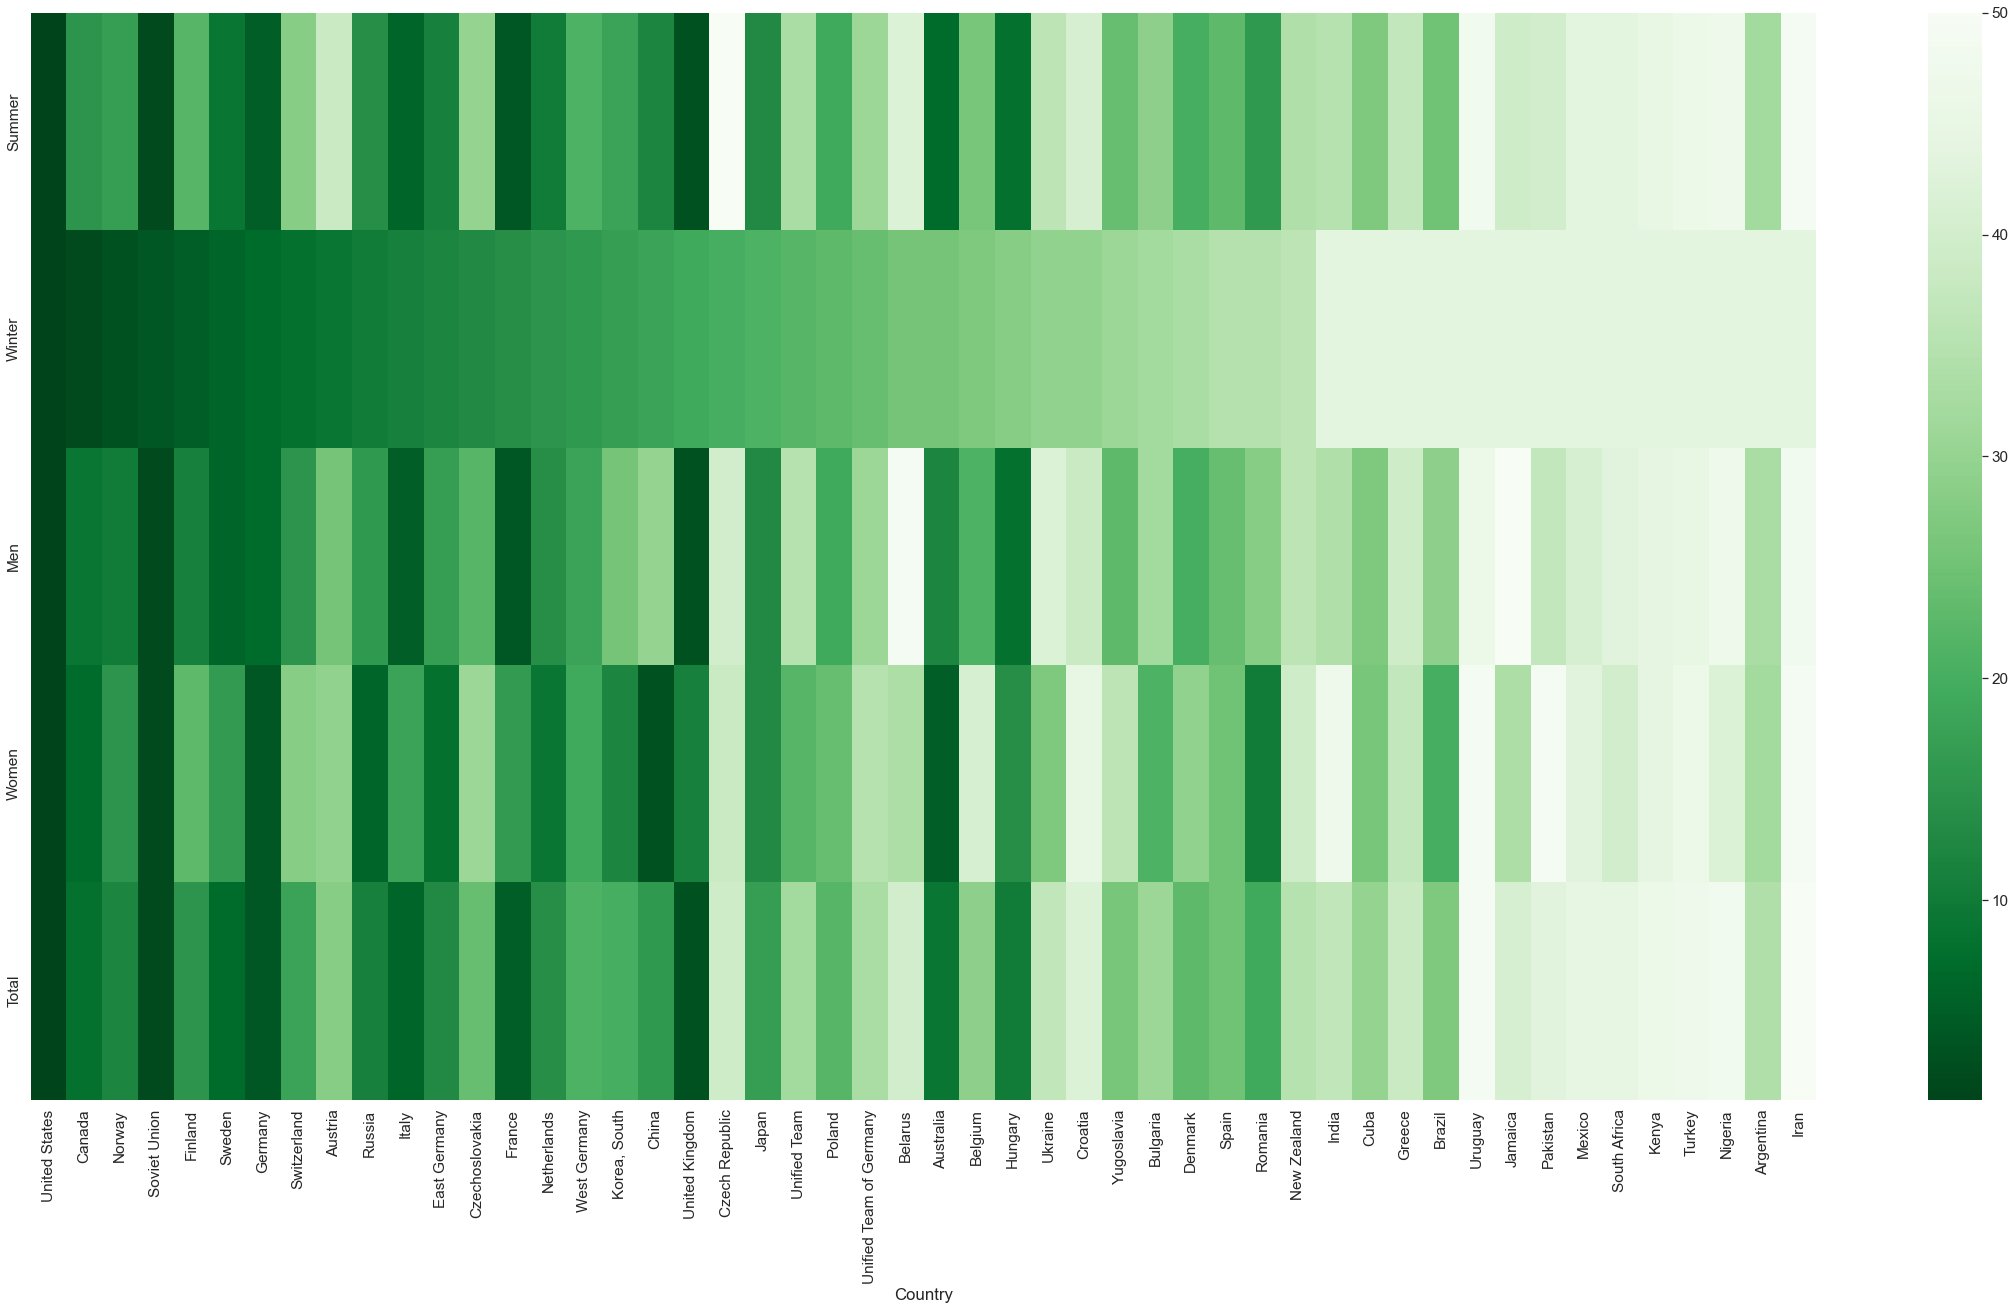

In [202]:
plt.figure(figsize=(40,20))
sns.heatmap(medal_for_cats_top50.sort_values(by = 'Winter').T, cmap = 'Greens_r')
plt.show()

In [207]:
diff_rank = medal_for_cats_top50.Summer.sub(medal_for_cats_top50.Winter).sort_values().to_frame()

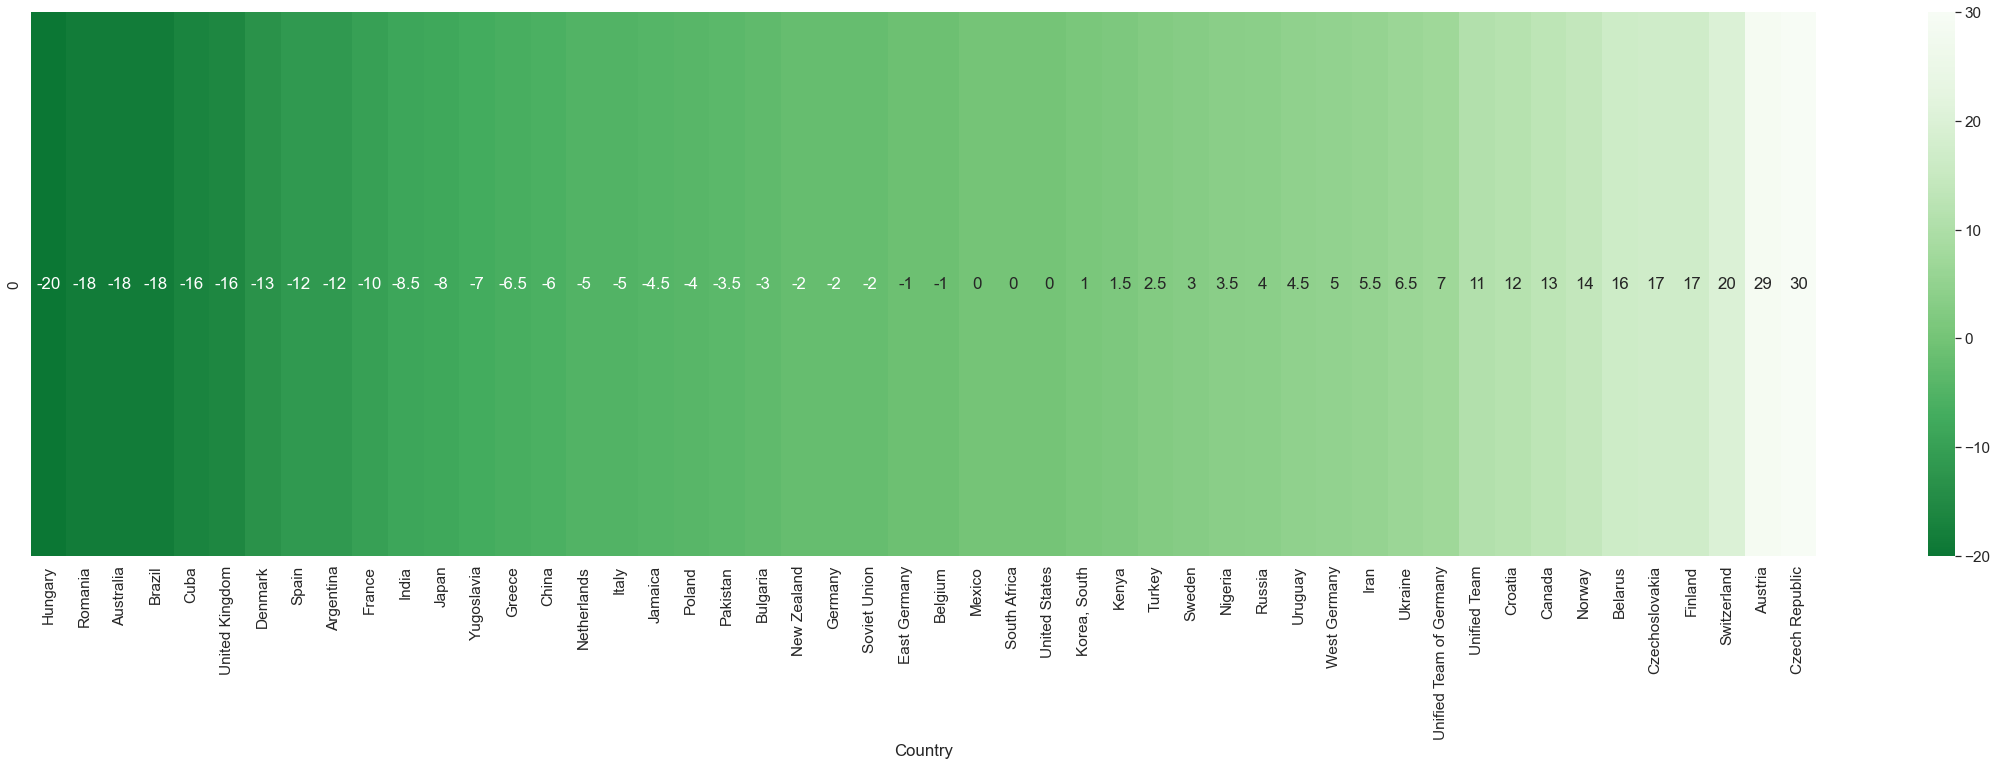

In [216]:
plt.figure(figsize=(40,10))
sns.heatmap(diff_rank.T, cmap = 'Greens_r', center = 0, annot = True)
plt.show()

## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

What could be the reasons?

In [248]:
women_men_equality = medal_for_cats.Men.sub(medal_for_cats.Women).sort_values().rank().to_frame()

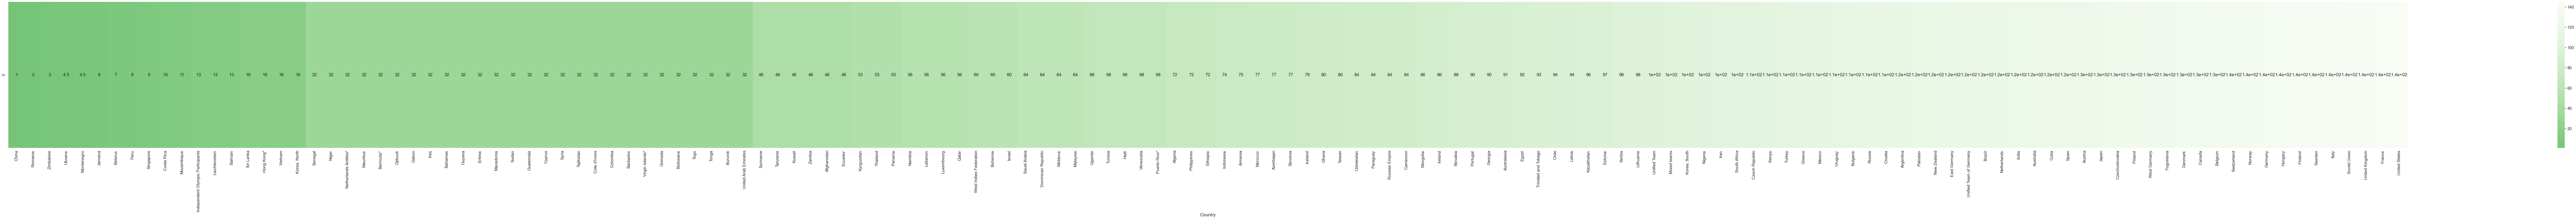

In [251]:
plt.figure(figsize=(200,10))
sns.heatmap(women_men_equality.T, cmap = 'Greens_r', center = 0, annot = True)
plt.show()

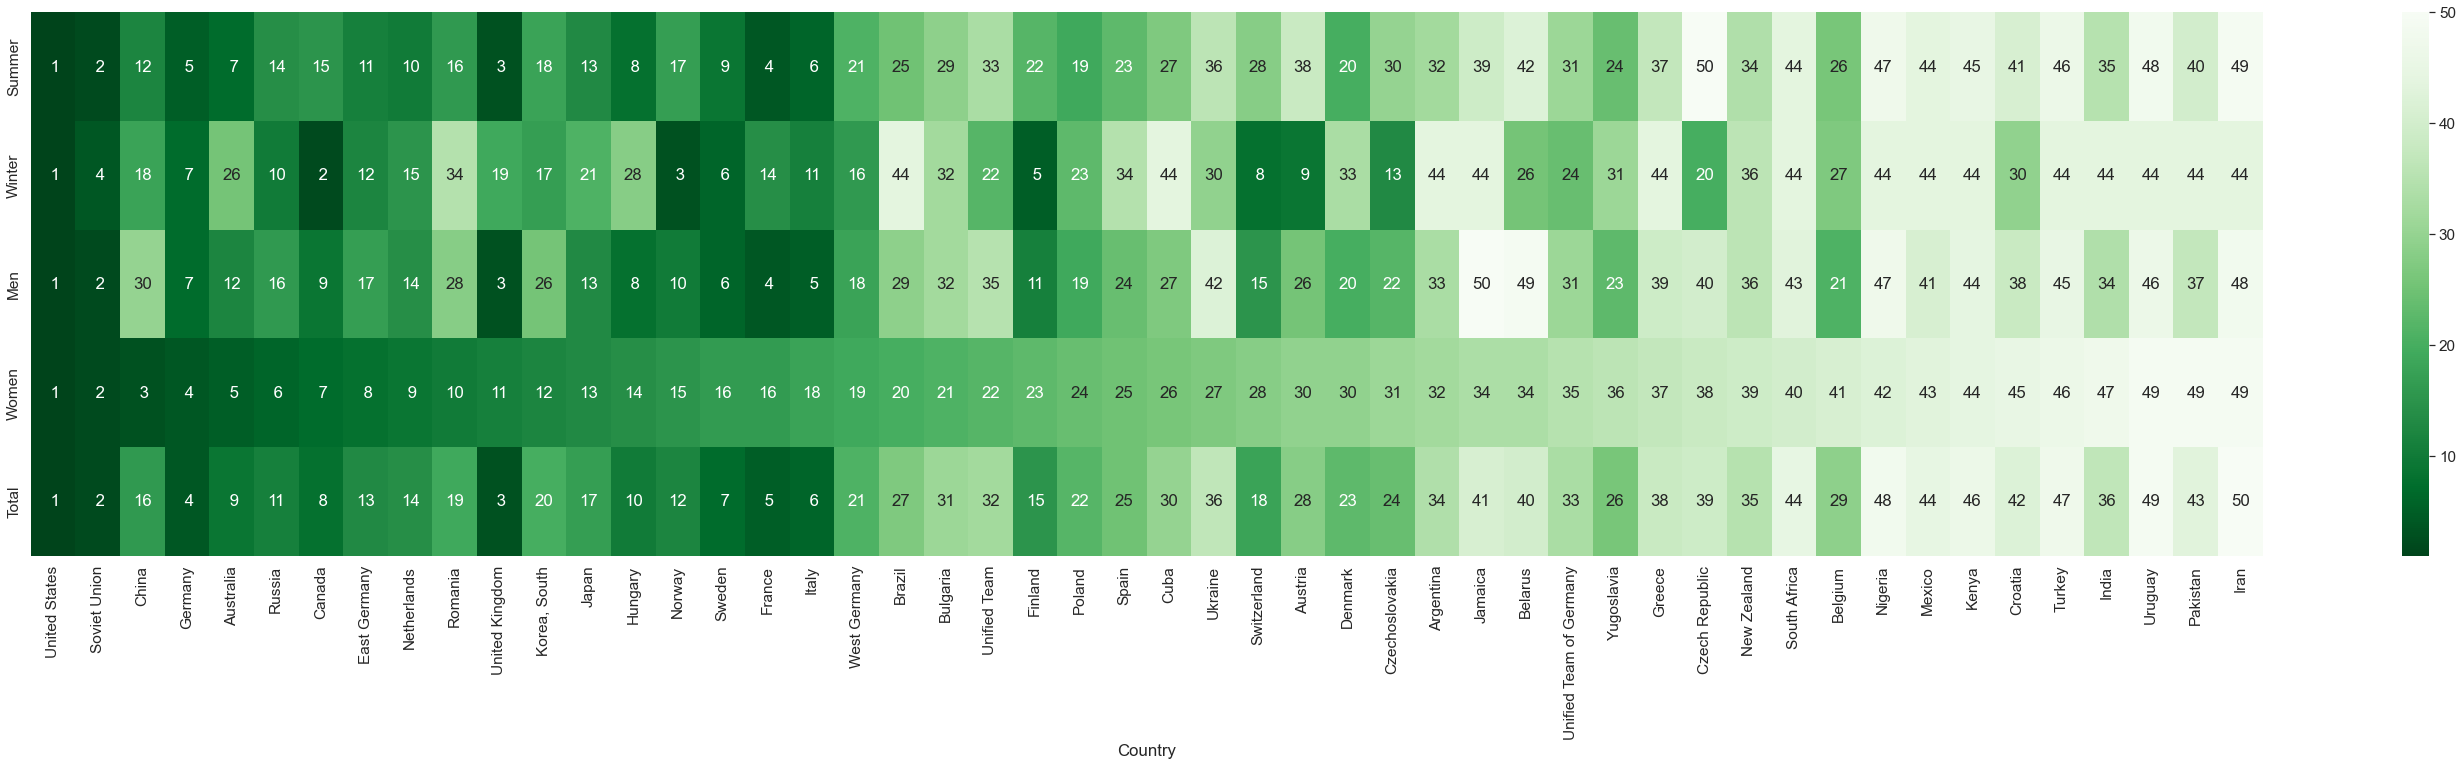

In [256]:
plt.figure(figsize = (50, 10))
sns.heatmap(medal_for_cats_top50.sort_values(by = "Women").T,cmap='Greens_r',annot=True,fmt='2.0f')
plt.show()

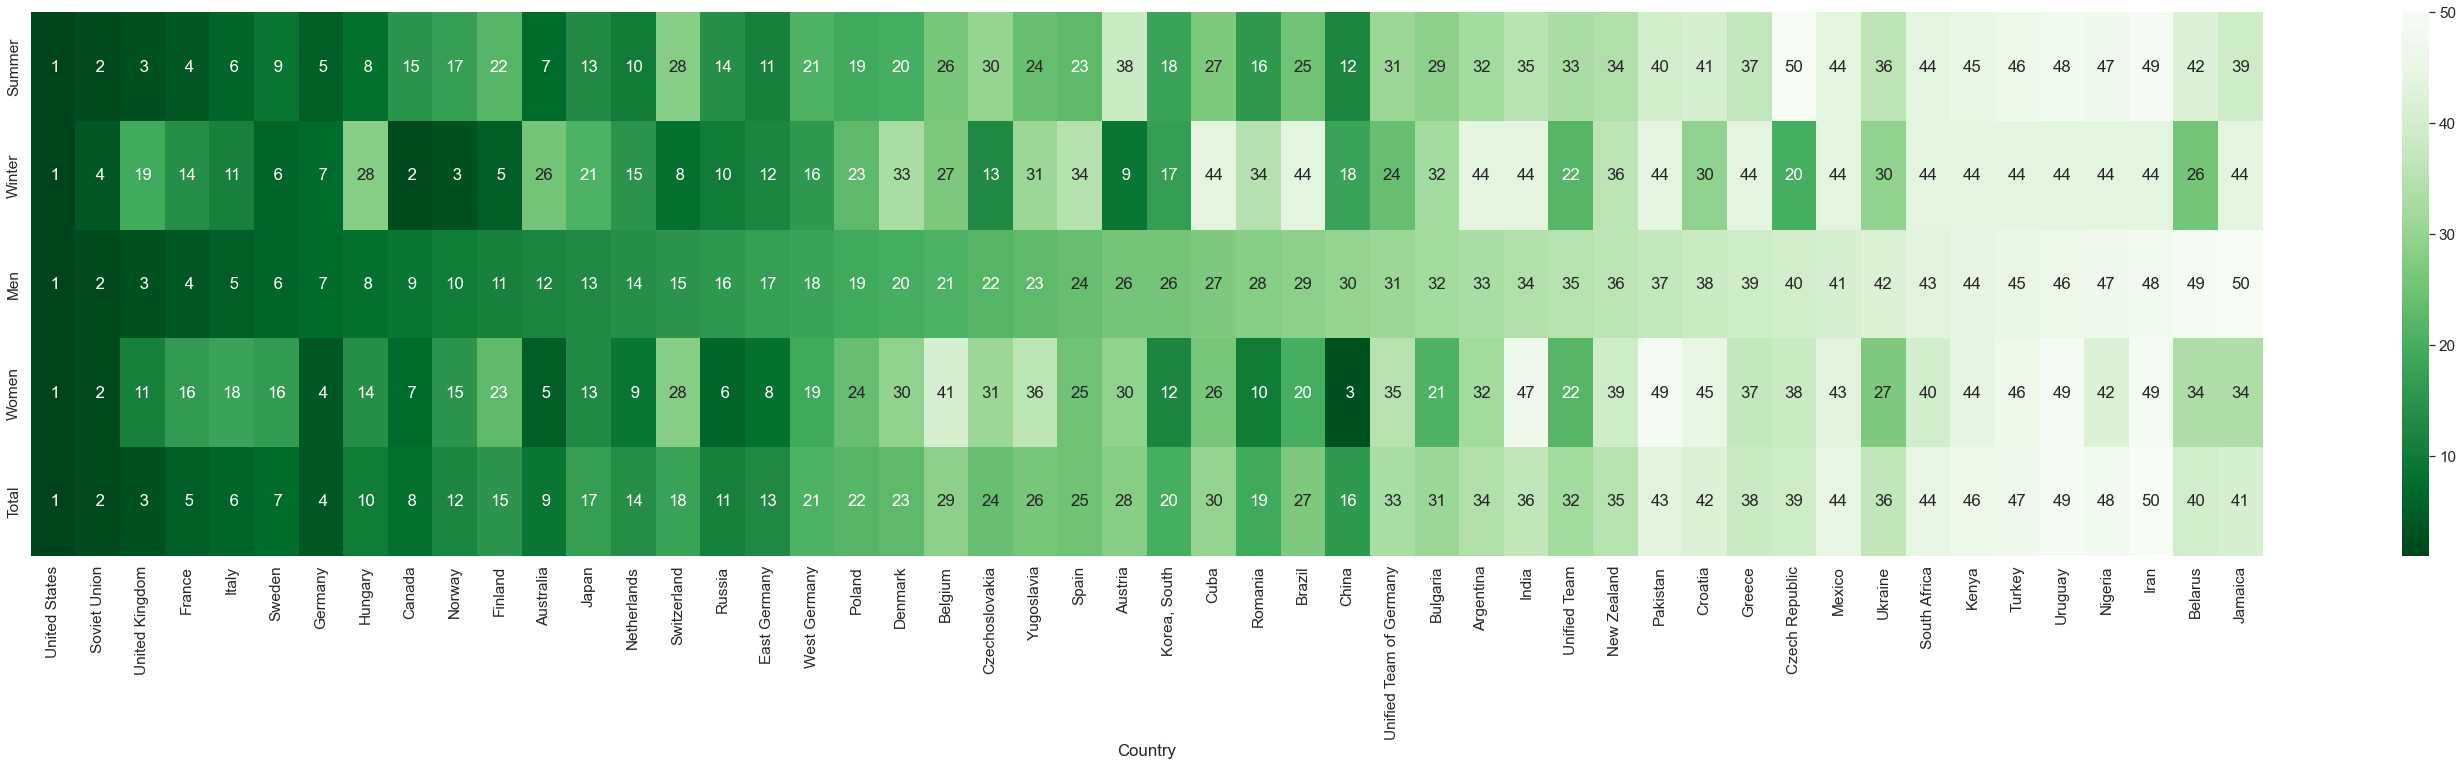

In [255]:
plt.figure(figsize = (50, 10))
sns.heatmap(medal_for_cats_top50.sort_values(by = "Men").T,cmap='Greens_r',annot=True,fmt='2.0f')
plt.show()

## Do Traditions matter?


Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

In [276]:
top50_by_sports = pd.crosstab(olympics.Country,olympics.Sport,margins=True, margins_name= 'Total')
top50_by_sports = top50_by_sports.sort_values(by = 'Total', ascending = False).drop(index = 'Total')
top50_by_sports_rank = top50_by_sports.rank(ascending=False)

In [277]:
top50_by_sports_rank

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling,Total
Country,,,,,,,,,,,,,,,,,,,,,
United States,1.0,2.0,1.0,78.0,2.0,1.0,74.0,84.5,2.0,1.0,...,79.0,3.0,2.0,9.5,2.0,3.0,74.0,3.0,1.0,1.0
Soviet Union,4.0,10.5,3.0,78.0,76.0,2.0,74.0,5.0,12.0,4.0,...,79.0,89.5,90.5,79.0,76.5,1.0,74.0,1.0,2.0,2.0
United Kingdom,10.5,7.0,2.0,6.0,76.0,83.0,74.0,84.5,8.0,3.0,...,79.0,14.0,1.0,5.0,1.0,86.0,1.0,28.5,17.5,3.0
Germany,5.0,13.0,7.0,78.0,76.0,83.0,74.0,1.0,3.0,10.0,...,3.0,19.5,7.0,5.0,76.5,21.5,74.0,7.5,14.0,4.0
France,14.0,4.0,8.0,78.0,76.0,6.0,1.5,4.0,14.0,13.5,...,8.0,6.0,3.0,79.0,6.5,86.0,2.0,10.5,17.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eritrea,101.0,84.0,88.0,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0,133.5
Tonga,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0,133.5
Togo,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0,133.5


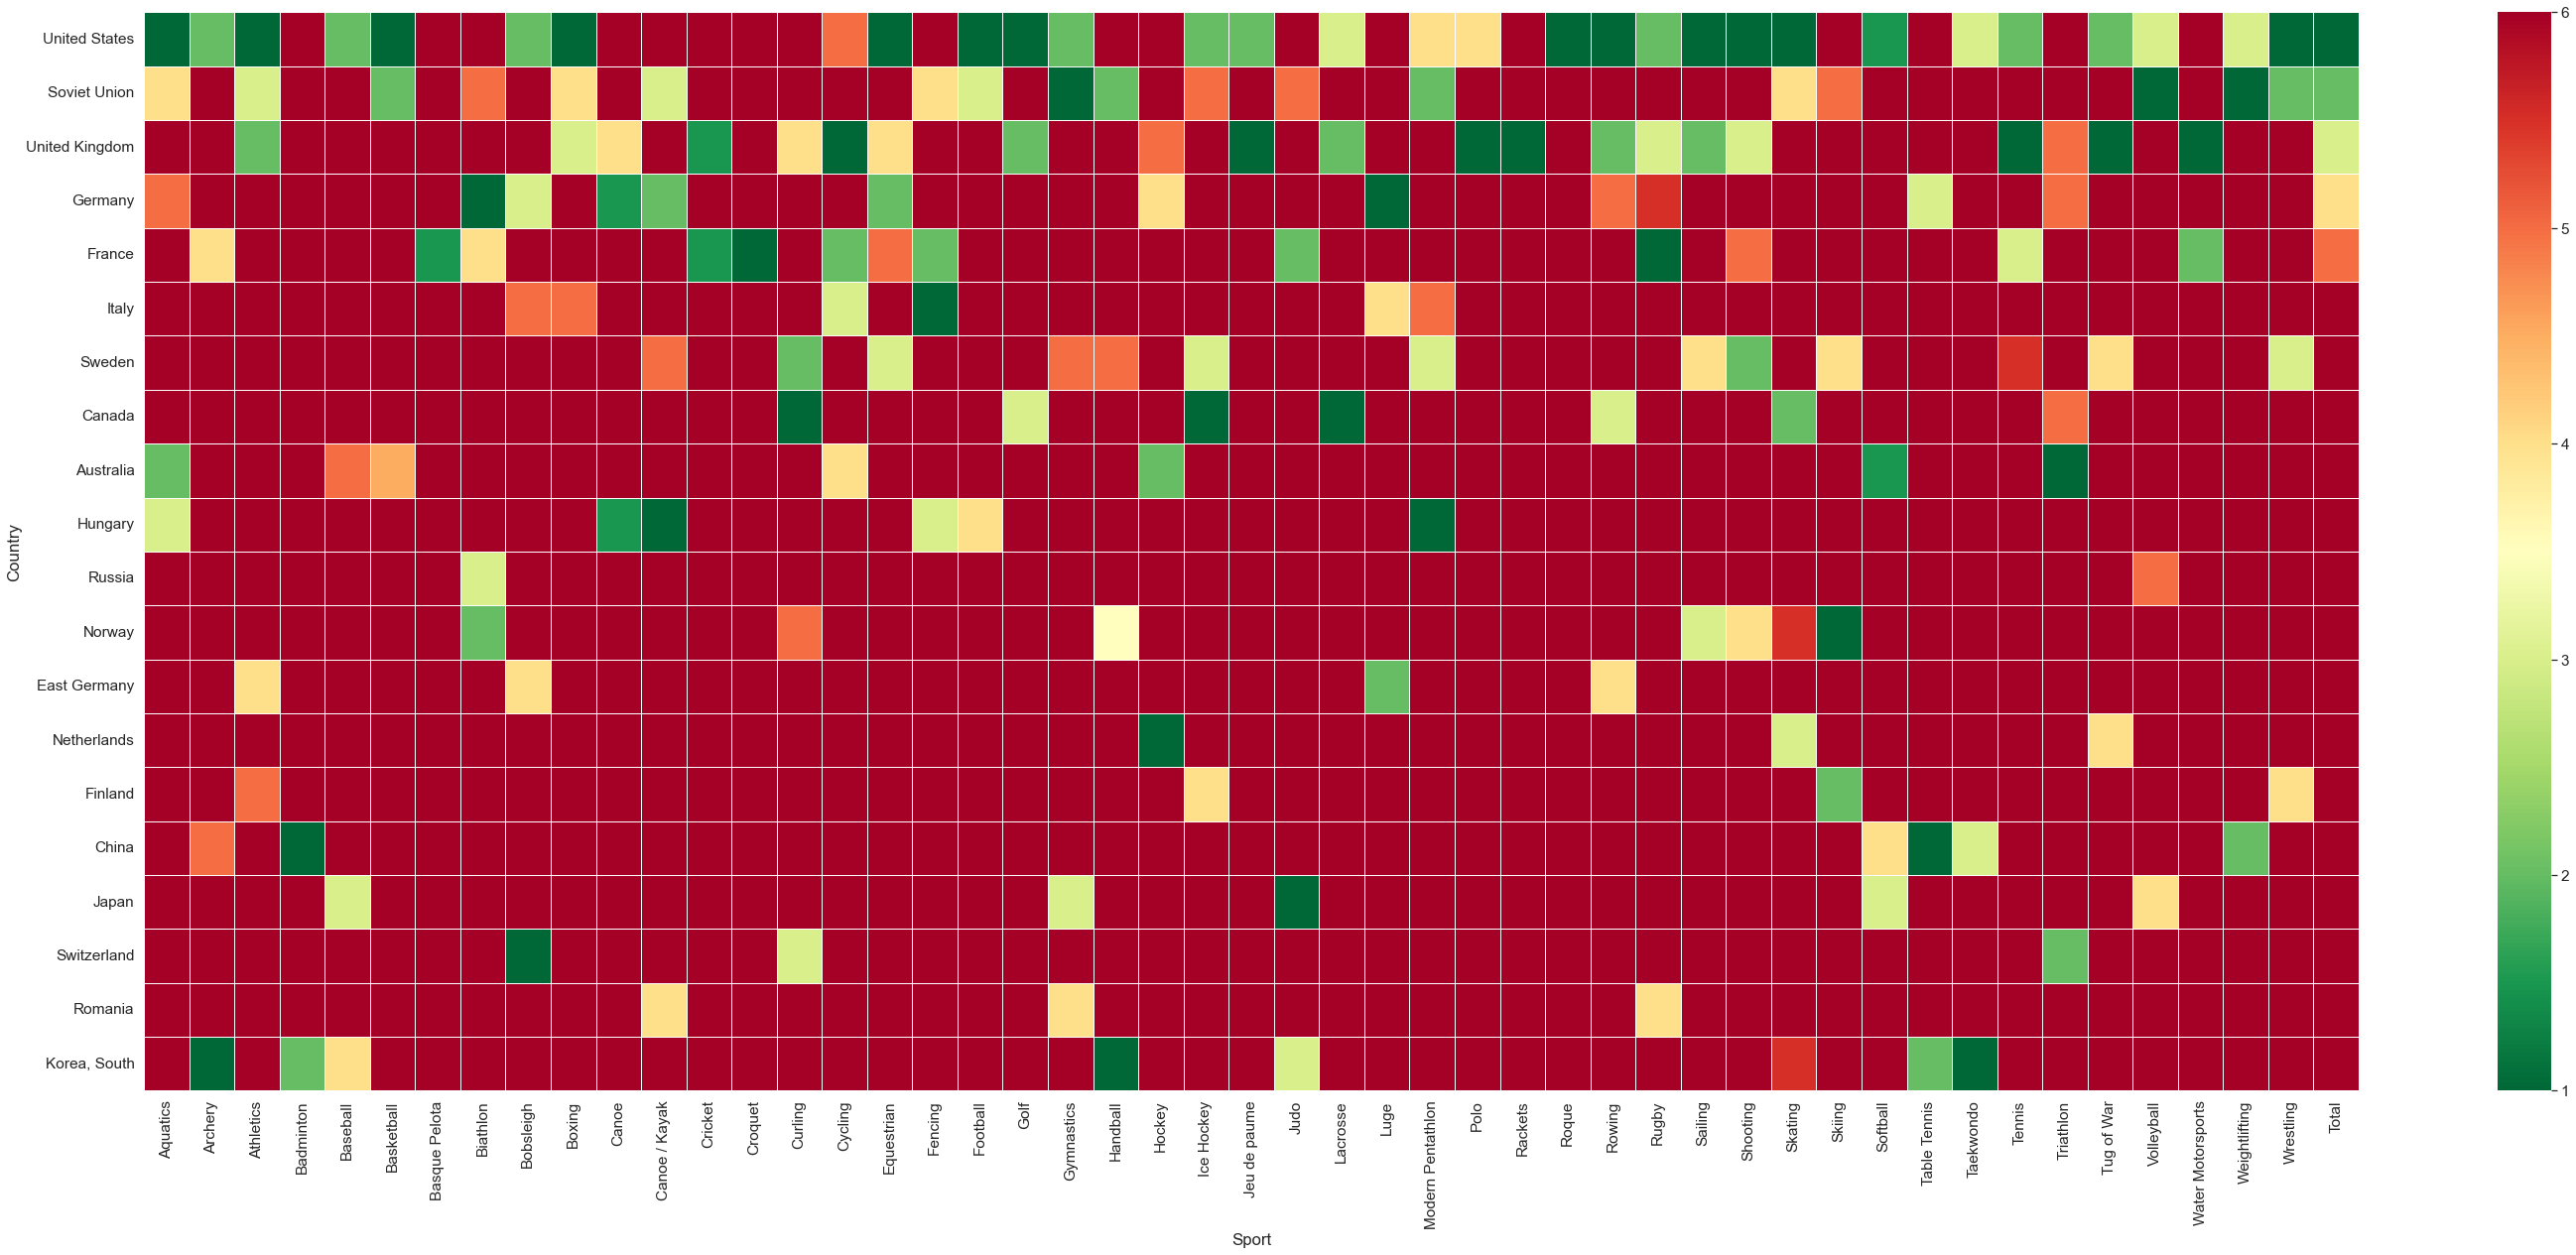

In [297]:
plt.figure(figsize = (50, 20))
sns.heatmap(top50_by_sports_rank.head(20),cmap ='RdYlGn_r', fmt='2.0f',vmin=1 , vmax = 6,linewidth = 1)
plt.show()